<a href="https://colab.research.google.com/github/Meerna951/WH_EcoFish/blob/main/EcoFishPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# יצירת הנתונים הבסיסיים
def create_ecofish_excel():
    # נתוני גופי המים הבסיסיים
    water_bodies_data = [
        {
            "name": "ים כנרת",
            "type": "אגם",
            "region": "צפון",
            "location": "צפון ישראל",
            "size_km2": 166.7,
            "depth_m": 43.0,
            "water_quality": "טובה",
            "fishing_allowed": True,
            "last_updated": "2024-12-01"
        },
        {
            "name": "ים המלח",
            "type": "ים",
            "region": "דרום",
            "location": "דרום ישראל",
            "size_km2": 810.0,
            "depth_m": 304.0,
            "water_quality": "ייחודית",
            "fishing_allowed": False,
            "last_updated": "2024-12-01"
        },
        {
            "name": "ים התיכון",
            "type": "ים",
            "region": "מרכז",
            "location": "חוף הים התיכון",
            "size_km2": 2500.0,
            "depth_m": 120.0,
            "water_quality": "טובה",
            "fishing_allowed": True,
            "last_updated": "2024-12-01"
        },
        {
            "name": "אגם חולה",
            "type": "אגם",
            "region": "צפון",
            "location": "עמק החולה",
            "size_km2": 2.3,
            "depth_m": 8.5,
            "water_quality": "מצוינת",
            "fishing_allowed": True,
            "last_updated": "2024-12-01"
        },
        {
            "name": "אגם עכו",
            "type": "אגם",
            "region": "צפון",
            "location": "עכו",
            "size_km2": 1.2,
            "depth_m": 4.2,
            "water_quality": "בינונית",
            "fishing_allowed": False,
            "last_updated": "2024-12-01"
        },
        {
            "name": "ים סוף",
            "type": "ים",
            "region": "דרום",
            "location": "אילת",
            "size_km2": 450.0,
            "depth_m": 180.0,
            "water_quality": "מצוינת",
            "fishing_allowed": True,
            "last_updated": "2024-12-01"
        },
        {
            "name": "אגם פארק הירקון",
            "type": "אגם",
            "region": "מרכז",
            "location": "תל אביב",
            "size_km2": 0.5,
            "depth_m": 3.0,
            "water_quality": "טובה",
            "fishing_allowed": True,
            "last_updated": "2024-12-01"
        },
        {
            "name": "אגם אשדוד",
            "type": "אגם",
            "region": "דרום",
            "location": "אשדוד",
            "size_km2": 1.8,
            "depth_m": 6.0,
            "water_quality": "בינונית",
            "fishing_allowed": True,
            "last_updated": "2024-12-01"
        }
    ]

    # נתוני דגים
    fish_data = [
        # ים כנרת
        {"water_body": "ים כנרת", "fish_species": "בורי", "count": 450, "avg_weight_kg": 1.2, "breeding_season": "אביב"},
        {"water_body": "ים כנרת", "fish_species": "כרפיון", "count": 320, "avg_weight_kg": 2.1, "breeding_season": "קיץ"},
        {"water_body": "ים כנרת", "fish_species": "אמנון", "count": 280, "avg_weight_kg": 0.8, "breeding_season": "אביב"},
        {"water_body": "ים כנרת", "fish_species": "מושט", "count": 180, "avg_weight_kg": 1.5, "breeding_season": "סתיו"},

        # ים המלח
        {"water_body": "ים המלח", "fish_species": "ארטמיה", "count": 50000, "avg_weight_kg": 0.001, "breeding_season": "קיץ"},

        # ים התיכון
        {"water_body": "ים התיכון", "fish_species": "דניס", "count": 2500, "avg_weight_kg": 1.8, "breeding_season": "אביב"},
        {"water_body": "ים התיכון", "fish_species": "לברק", "count": 1800, "avg_weight_kg": 2.2, "breeding_season": "קיץ"},
        {"water_body": "ים התיכון", "fish_species": "מקרל", "count": 1200, "avg_weight_kg": 0.8, "breeding_season": "סתיו"},
        {"water_body": "ים התיכון", "fish_species": "סרדין", "count": 3000, "avg_weight_kg": 0.3, "breeding_season": "אביב"},
        {"water_body": "ים התיכון", "fish_species": "בורי", "count": 900, "avg_weight_kg": 1.4, "breeding_season": "קיץ"},

        # אגם חולה
        {"water_body": "אגם חולה", "fish_species": "בס", "count": 180, "avg_weight_kg": 1.8, "breeding_season": "אביב"},
        {"water_body": "אגם חולה", "fish_species": "כרפיון", "count": 220, "avg_weight_kg": 1.4, "breeding_season": "קיץ"},
        {"water_body": "אגם חולה", "fish_species": "אמנון", "count": 150, "avg_weight_kg": 0.9, "breeding_season": "אביב"},

        # אגם עכו
        {"water_body": "אגם עכו", "fish_species": "מקרל", "count": 95, "avg_weight_kg": 0.6, "breeding_season": "סתיו"},
        {"water_body": "אגם עכו", "fish_species": "סרדין", "count": 120, "avg_weight_kg": 0.3, "breeding_season": "אביב"},
        {"water_body": "אגם עכו", "fish_species": "בורי", "count": 80, "avg_weight_kg": 1.1, "breeding_season": "קיץ"},

        # ים סוף
        {"water_body": "ים סוף", "fish_species": "ציפורן", "count": 800, "avg_weight_kg": 1.5, "breeding_season": "קיץ"},
        {"water_body": "ים סוף", "fish_species": "דניס", "count": 600, "avg_weight_kg": 2.0, "breeding_season": "אביב"},
        {"water_body": "ים סוף", "fish_species": "לברק", "count": 400, "avg_weight_kg": 2.5, "breeding_season": "קיץ"},

        # אגם פארק הירקון
        {"water_body": "אגם פארק הירקון", "fish_species": "כרפיון", "count": 120, "avg_weight_kg": 1.0, "breeding_season": "קיץ"},
        {"water_body": "אגם פארק הירקון", "fish_species": "אמנון", "count": 80, "avg_weight_kg": 0.7, "breeding_season": "אביב"},

        # אגם אשדוד
        {"water_body": "אגם אשדוד", "fish_species": "בורי", "count": 200, "avg_weight_kg": 1.3, "breeding_season": "קיץ"},
        {"water_body": "אגם אשדוד", "fish_species": "מושט", "count": 150, "avg_weight_kg": 1.6, "breeding_season": "סתיו"},
        {"water_body": "אגם אשדוד", "fish_species": "כרפיון", "count": 180, "avg_weight_kg": 1.1, "breeding_season": "קיץ"},
    ]

    # יצירת DataFrames
    df_water_bodies = pd.DataFrame(water_bodies_data)
    df_fish = pd.DataFrame(fish_data)

    # שמירה בקובץ Excel עם שני גיליונות
    with pd.ExcelWriter('ecofish_data.xlsx', engine='openpyxl') as writer:
        df_water_bodies.to_excel(writer, sheet_name='Water_Bodies', index=False)
        df_fish.to_excel(writer, sheet_name='Fish_Data', index=False)

    print("✅ קובץ Excel נוצר בהצלחה: ecofish_data.xlsx")
    print(f"📊 גיליון 'Water_Bodies': {len(df_water_bodies)} גופי מים")
    print(f"🐟 גיליון 'Fish_Data': {len(df_fish)} רשומות דגים")
    print("\nמבנה הקובץ:")
    print("- גיליון 1: Water_Bodies (נתוני גופי המים הבסיסיים)")
    print("- גיליון 2: Fish_Data (נתוני הדגים לכל גוף מים)")

    return df_water_bodies, df_fish

# יצירת הקובץ
water_bodies_df, fish_df = create_ecofish_excel()

# הצגת דוגמה מהנתונים
print("\n🔍 דוגמה מנתוני גופי המים:")
print(water_bodies_df.head(3))

print("\n🔍 דוגמה מנתוני הדגים:")
print(fish_df.head(5))

✅ קובץ Excel נוצר בהצלחה: ecofish_data.xlsx
📊 גיליון 'Water_Bodies': 8 גופי מים
🐟 גיליון 'Fish_Data': 24 רשומות דגים

מבנה הקובץ:
- גיליון 1: Water_Bodies (נתוני גופי המים הבסיסיים)
- גיליון 2: Fish_Data (נתוני הדגים לכל גוף מים)

🔍 דוגמה מנתוני גופי המים:
        name type region        location  size_km2  depth_m water_quality  \
0    ים כנרת  אגם   צפון      צפון ישראל     166.7     43.0          טובה   
1    ים המלח   ים   דרום      דרום ישראל     810.0    304.0       ייחודית   
2  ים התיכון   ים   מרכז  חוף הים התיכון    2500.0    120.0          טובה   

   fishing_allowed last_updated  
0             True   2024-12-01  
1            False   2024-12-01  
2             True   2024-12-01  

🔍 דוגמה מנתוני הדגים:
  water_body fish_species  count  avg_weight_kg breeding_season
0    ים כנרת         בורי    450          1.200            אביב
1    ים כנרת       כרפיון    320          2.100             קיץ
2    ים כנרת        אמנון    280          0.800            אביב
3    ים כנרת       

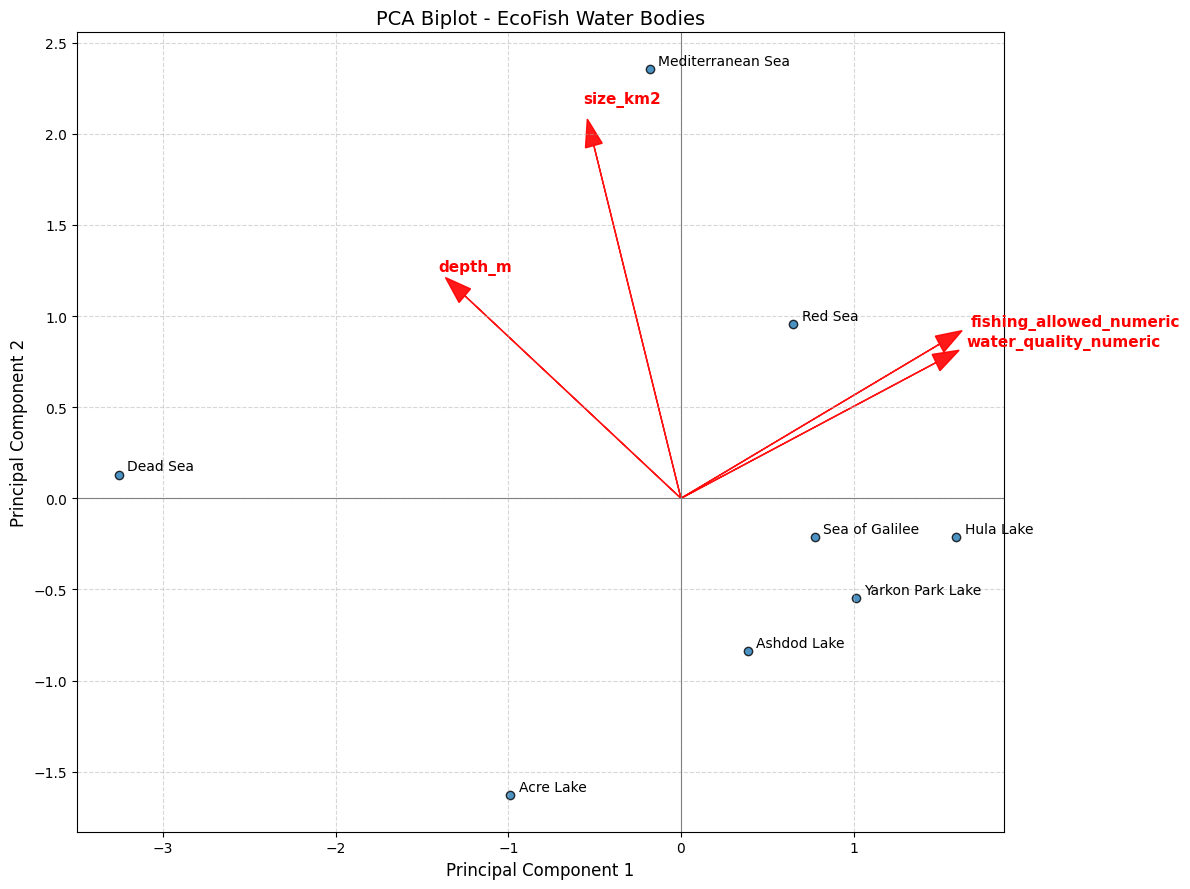

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the water bodies data in English
water_bodies_data = [
    {"name": "Sea of Galilee", "type": "Lake", "region": "North", "location": "Northern Israel",
     "size_km2": 166.7, "depth_m": 43.0, "water_quality": "Good", "fishing_allowed": True},
    {"name": "Dead Sea", "type": "Sea", "region": "South", "location": "Southern Israel",
     "size_km2": 810.0, "depth_m": 304.0, "water_quality": "Unique", "fishing_allowed": False},
    {"name": "Mediterranean Sea", "type": "Sea", "region": "Center", "location": "Mediterranean Coast",
     "size_km2": 2500.0, "depth_m": 120.0, "water_quality": "Good", "fishing_allowed": True},
    {"name": "Hula Lake", "type": "Lake", "region": "North", "location": "Hula Valley",
     "size_km2": 2.3, "depth_m": 8.5, "water_quality": "Excellent", "fishing_allowed": True},
    {"name": "Acre Lake", "type": "Lake", "region": "North", "location": "Acre",
     "size_km2": 1.2, "depth_m": 4.2, "water_quality": "Moderate", "fishing_allowed": False},
    {"name": "Red Sea", "type": "Sea", "region": "South", "location": "Eilat",
     "size_km2": 450.0, "depth_m": 180.0, "water_quality": "Excellent", "fishing_allowed": True},
    {"name": "Yarkon Park Lake", "type": "Lake", "region": "Center", "location": "Tel Aviv",
     "size_km2": 0.5, "depth_m": 3.0, "water_quality": "Good", "fishing_allowed": True},
    {"name": "Ashdod Lake", "type": "Lake", "region": "South", "location": "Ashdod",
     "size_km2": 1.8, "depth_m": 6.0, "water_quality": "Moderate", "fishing_allowed": True},
]

# Create DataFrame
df = pd.DataFrame(water_bodies_data)

# Map water quality to numeric values
quality_map_en = {"Excellent": 3, "Good": 2, "Moderate": 1, "Unique": 0}
df["water_quality_numeric"] = df["water_quality"].map(quality_map_en)
df["fishing_allowed_numeric"] = df["fishing_allowed"].astype(int)

# Select numerical features for PCA
features = ["size_km2", "depth_m", "water_quality_numeric", "fishing_allowed_numeric"]
x = df[features]
names = df["name"]

# Standardize data
x_scaled = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["name"] = names

# Plot PCA biplot
plt.figure(figsize=(12, 9))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.8, edgecolors='k')

# Add site names
for i, name in enumerate(pca_df["name"]):
    plt.annotate(name, (pca_df["PC1"][i], pca_df["PC2"][i]),
                 textcoords="offset points", xytext=(6, 3), ha='left', fontsize=10)

# Plot feature vectors
loadings = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*2.5, loadings[i, 1]*2.5, color='red', alpha=0.9, head_width=0.1)
    plt.text(loadings[i, 0]*2.8, loadings[i, 1]*2.8, feature, color='red', fontsize=11, weight='bold')

# Styling
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("PCA Biplot - EcoFish Water Bodies", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.tight_layout()
plt.show()


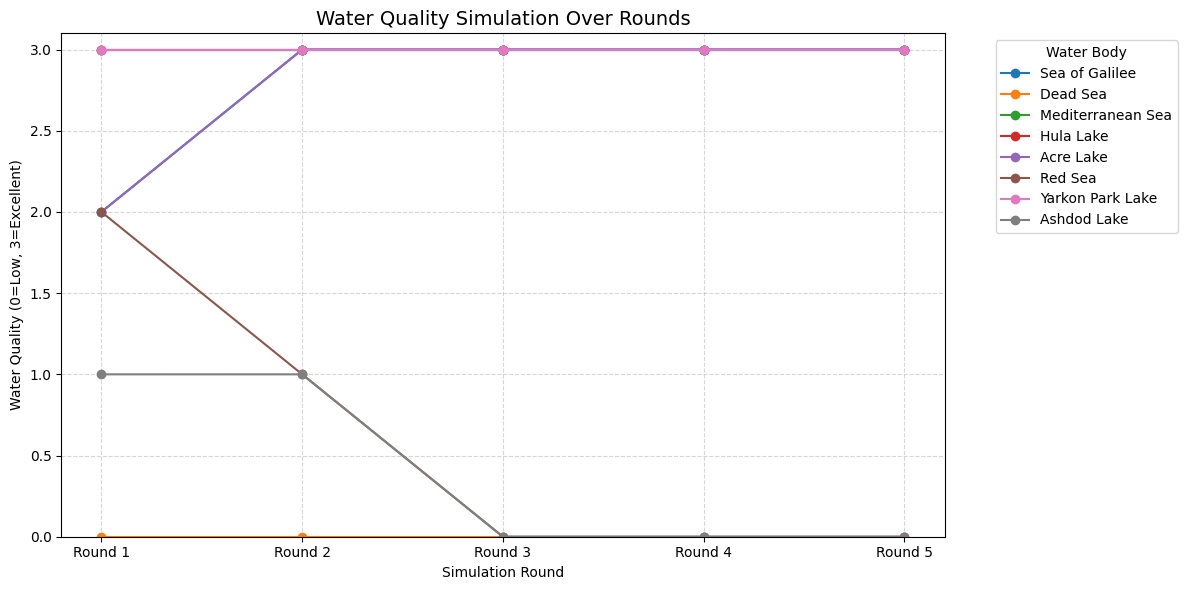

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# שלב 1: הגדרת הנתונים של גופי המים
data = {
    "name": ["Sea of Galilee", "Dead Sea", "Mediterranean Sea", "Hula Lake", "Acre Lake", "Red Sea",
             "Yarkon Park Lake", "Ashdod Lake"],
    "region": ["North", "South", "Center", "North", "North", "South", "Center", "South"],
    "water_quality": ["Good", "Unique", "Good", "Excellent", "Moderate", "Excellent", "Good", "Moderate"]
}

# המרה לערכים מספריים: 0–3
quality_map = {"Excellent": 3, "Good": 2, "Moderate": 1, "Unique": 0}
df = pd.DataFrame(data)
df["quality"] = df["water_quality"].map(quality_map)

# פונקציה למציאת השכנים לפי אזור
def get_neighbors(df, region):
    return df[df["region"] == region]

# פונקציית עדכון איכות המים לפי מצב שכנים
def update_quality(df):
    new_quality = []
    for i, row in df.iterrows():
        neighbors = get_neighbors(df, row["region"])
        if len(neighbors) <= 1:
            new_quality.append(row["quality"])
            continue
        others = neighbors[neighbors["name"] != row["name"]]
        low = len(others[others["quality"] <= 1])
        high = len(others[others["quality"] >= 2])
        if high > len(others)/2 and row["quality"] < 3:
            new_quality.append(row["quality"] + 1)
        elif low > len(others)/2 and row["quality"] > 0:
            new_quality.append(row["quality"] - 1)
        else:
            new_quality.append(row["quality"])
    return new_quality

# יצירת טבלת היסטוריה לאורך 5 סבבים
history = pd.DataFrame({"name": df["name"]})
for round_num in range(5):
    df["quality"] = update_quality(df)
    history[f"Round {round_num + 1}"] = df["quality"]

# המרת הטבלה לפורמט מתאים לגרף
melted = pd.melt(history, id_vars=["name"], var_name="Round", value_name="Quality")

# שלב 2: ציור הגרף
plt.figure(figsize=(12, 6))
for name in melted["name"].unique():
    subset = melted[melted["name"] == name]
    plt.plot(subset["Round"], subset["Quality"], marker='o', label=name)

plt.title("Water Quality Simulation Over Rounds", fontsize=14)
plt.xlabel("Simulation Round")
plt.ylabel("Water Quality (0=Low, 3=Excellent)")
plt.ylim(0, 3.1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Water Body", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
